# Penguins

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

## Dataset

In [2]:
df = sns.load_dataset("penguins", cache=False)

In [3]:
df.shape

(344, 7)

In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### categorical

#### species

In [6]:
df.species.isna().sum()

0

In [7]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
map_species = dict(zip(df.species.unique(), range(1, len(df.species.unique())+1)))
map_species

{'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}

In [9]:
map_species_r = dict([(m,n) for n,m in map_species.items()])
map_species_r

{1: 'Adelie', 2: 'Chinstrap', 3: 'Gentoo'}

In [10]:
try:
    df.insert(1, 'species_n', df.species.map(map_species))
except Exception as exception:
    print(exception)

In [11]:
df.species_n.value_counts()

species_n
1    152
3    124
2     68
Name: count, dtype: int64

In [12]:
df.groupby(['species']).agg(
    mean  = pd.NamedAgg(column='body_mass_g', aggfunc=lambda n: n.mean().astype(int)),
    count = pd.NamedAgg(column='body_mass_g', aggfunc='count'),
    island = pd.NamedAgg(column='island', aggfunc=lambda n: n.mode()),
    sex = pd.NamedAgg(column='sex', aggfunc=lambda n: n.mode()),
)

,mean,count,island,sex
species,,,,
Adelie,3700,151,Dream,"[Female, Male]"
Chinstrap,3733,68,Dream,"[Female, Male]"
Gentoo,5076,123,Biscoe,Male


#### island

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   species_n          344 non-null    int64  
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [14]:
df.island.isna().sum()

0

In [15]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [16]:
map_island = dict(zip(df.island.unique(), range(1, len(df.island.unique())+1)))
map_island

{'Torgersen': 1, 'Biscoe': 2, 'Dream': 3}

In [17]:
map_island_r = dict([(m,n) for n,m in map_island.items()])
map_island_r

{1: 'Torgersen', 2: 'Biscoe', 3: 'Dream'}

In [18]:
try:
    df.insert(3, 'island_n', df.island.map(map_island))
except Exception as exception:
    print(exception)

In [19]:
df.groupby(['island']).agg(
    mean  = pd.NamedAgg(column='body_mass_g', aggfunc=lambda n: n.mean().astype(int)),
    count = pd.NamedAgg(column='body_mass_g', aggfunc='count'),
    species = pd.NamedAgg(column='species', aggfunc=lambda n: n.mode()),
    species_n = pd.NamedAgg(column='species_n', aggfunc=lambda n: n.mode()),
    sex = pd.NamedAgg(column='sex', aggfunc=lambda n: n.mode()),
)

,mean,count,species,species_n,sex
island,,,,,
Biscoe,4716,167,Gentoo,3,Male
Dream,3712,124,Chinstrap,2,Male
Torgersen,3706,51,Adelie,1,Female


#### sex

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   species_n          344 non-null    int64  
 2   island             344 non-null    object 
 3   island_n           344 non-null    int64  
 4   bill_length_mm     342 non-null    float64
 5   bill_depth_mm      342 non-null    float64
 6   flipper_length_mm  342 non-null    float64
 7   body_mass_g        342 non-null    float64
 8   sex                333 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [21]:
df.sex.isna().sum()

11

In [22]:
df = df[~df.sex.isna()]

In [23]:
df.reset_index(inplace=True, drop=True)

In [24]:
temp = df.sex
df.drop(['sex'], axis=1, inplace=True)
df.insert(4, 'sex', temp)

In [25]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [26]:
map_sex = dict(zip(df.sex.unique(), range(1, len(df.sex.unique())+1)))
map_sex

{'Male': 1, 'Female': 2}

In [27]:
map_sex_r = dict([(m,n) for n,m in map_sex.items()])
map_sex_r

{1: 'Male', 2: 'Female'}

In [28]:
try:
    df.insert(5, 'sex_n', df.sex.map(map_sex))
except Exception as exception:
    print(exception)

In [29]:
df.groupby(['sex']).agg(
    mean  = pd.NamedAgg(column='body_mass_g', aggfunc=lambda n: n.mean().astype(int)),
    count = pd.NamedAgg(column='body_mass_g', aggfunc='count'),
    species = pd.NamedAgg(column='species', aggfunc=lambda n: n.mode()),
    species_n = pd.NamedAgg(column='species_n', aggfunc=lambda n: n.mode()),
    island = pd.NamedAgg(column='island', aggfunc=lambda n: n.mode()),
    island_n = pd.NamedAgg(column='island_n', aggfunc=lambda n: n.mode()),
)

,mean,count,species,species_n,island,island_n
sex,,,,,,
Female,3862,165,Adelie,1,Biscoe,2
Male,4545,168,Adelie,1,Biscoe,2


### continuous

In [30]:
df.head(1)

,species,species_n,island,island_n,sex,sex_n,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,1,Torgersen,1,Male,1,39.1,18.7,181.0,3750.0


In [31]:
df.isna().sum()

species              0
species_n            0
island               0
island_n             0
sex                  0
sex_n                0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

## Correlation

In [1]:
def df_correlation (df_test, target, percent=40):
    types=['int64', 'float64', 'int32', 'float32', 'int', 'float']
    dict_corr = {}
    percent = 10 if percent < 10 else percent
    df_corr = df_test[list(df_test.select_dtypes(include=types).columns)].corr()
    row_index = 0
    for row in df_corr.iterrows():
        if row[0] in target or len(target) == 0:
            col_index = 0
            for col in df_corr.columns:
                value = df_corr.loc[row[0], col]
                if (value > percent/100 or value < -percent/100) and value != 1.0:
                    if row_index <= col_index or len(target) != 0:
                        sign = '+' if value > 0 else ''
                        print(f'{sign}{100*value:.1f}% [{row_index}] {row[0]} to [{col_index}] {col}') # {-math.log10(p_value):.0f}p
                        dict_corr[col] = np.abs(np.round(value,4))
                col_index += 1
        row_index += 1  
    dict_corr = dict(sorted(dict_corr.items(), key=lambda item: -item[1]))
    features = list(dict_corr.keys())
    return features

In [33]:
features = df_correlation(df, 'body_mass_g')

+75.0% [6] body_mass_g to [0] species_n
-42.5% [6] body_mass_g to [2] sex_n
+58.9% [6] body_mass_g to [3] bill_length_mm
-47.2% [6] body_mass_g to [4] bill_depth_mm
+87.3% [6] body_mass_g to [5] flipper_length_mm


In [34]:
features

['flipper_length_mm', 'species_n', 'bill_length_mm', 'bill_depth_mm', 'sex_n']

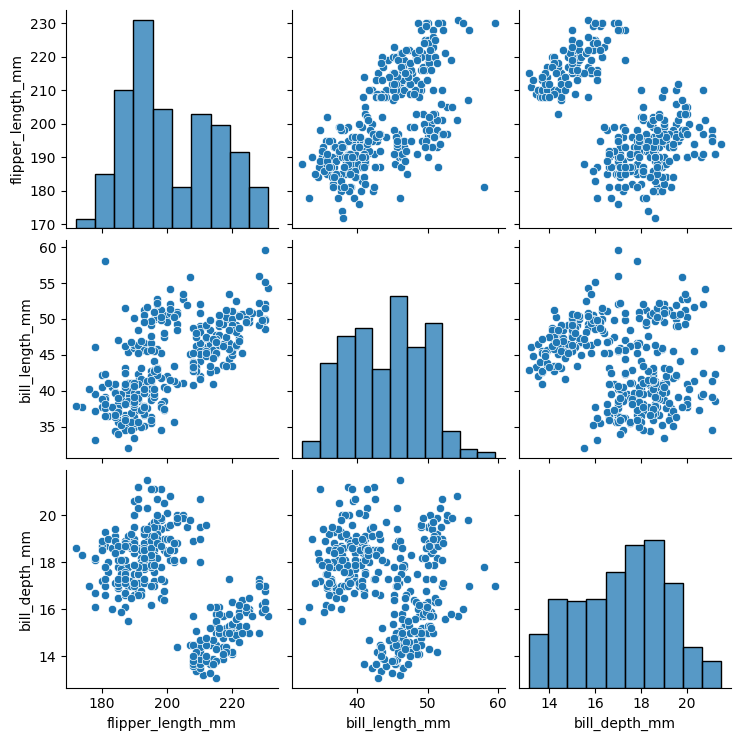

In [35]:
sns.pairplot(df[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']])

## Model

### Libraries

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
#from matplotlib.colors import to_rgba_array
from mycolorpy import colorlist as mcp

### Data

In [37]:
x_data = df[['flipper_length_mm', 'bill_length_mm', 'species_n']]
y_data = df['body_mass_g']

In [38]:
x_data.merge(y_data, how='outer', left_index=True, right_index=True).head(2)

,flipper_length_mm,bill_length_mm,species_n,body_mass_g
0,181.0,39.1,1,3750.0
1,186.0,39.5,1,3800.0


In [39]:
x_data.join(y_data, how='outer').head(2)

,flipper_length_mm,bill_length_mm,species_n,body_mass_g
0,181.0,39.1,1,3750.0
1,186.0,39.5,1,3800.0


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15)

In [41]:
model = LinearRegression()

In [42]:
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
r_squared = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_hat)

In [43]:
print(f'{r_squared = :.0%} {mse = :.0f}')

r_squared = 85% mse = 98835


### Results

see `05_03_01_Multiple_Linear.ipynb`

#### Equation

In [44]:
def df_equation(model, y_name, data):
    equation = y_name + ' = '
    for c, coef in enumerate(model.coef_):
        equation += f'{'+' if coef >= 0 else ''}{coef:.1f}*{data.columns[c]} '
    equation += f'{'+' if model.intercept_ >= 0 else ''}{model.intercept_:.1f}'
    return equation   

In [45]:
equation = df_equation(model, y_data.name, x_data)
print(equation)

body_mass_g = +48.9*flipper_length_mm +5.3*bill_length_mm +5.3*species_n -5859.4


#### Data

In [46]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 96 to 286
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  50 non-null     float64
 1   bill_length_mm     50 non-null     float64
 2   species_n          50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


In [47]:
x_test.shape, y_test.shape, y_hat.shape

((50, 3), (50,), (50,))

In [48]:
df_test = x_test[:]
df_test.insert(3, 'body_mass_g', np.round(y_test,1))
df_test.insert(4, 'prediction',  np.round(y_hat,1))
df_test.insert(5, 'residual',    np.round((df_test.prediction - df_test.body_mass_g),1))

In [49]:
df_test.head(2)

,flipper_length_mm,bill_length_mm,species_n,body_mass_g,prediction,residual
96,183.0,37.7,1,3075.0,3299.9,224.9
194,187.0,51.5,2,3250.0,3574.6,324.6


#### Plot

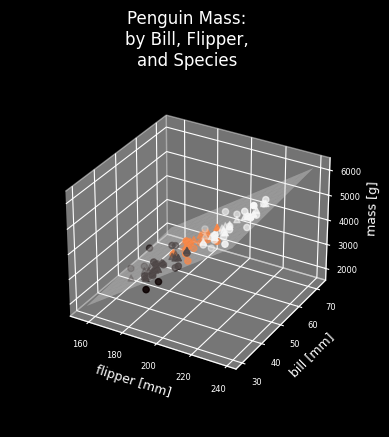

In [68]:
species_color_map = dict(zip(df_test.species_n.unique(),
                             mcp.gen_color(cmap = 'hot', 
                                           n = len(df_test.species_n.unique()))))
plt.style.use('dark_background') 
#plt.figure(figsize=plt.figaspect(0.5))
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(projection="3d"))
fig.suptitle('Penguin Mass:\nby Bill, Flipper,\nand Species')

# Data Sliced and Plotted (by Species)
for n, species_n in enumerate(df_test.species_n.unique()):
    
        # body mass data (circles)
        df_species = df_test[df_test.species_n==species_n]
        xs = df_species.flipper_length_mm 
        ys = df_species.bill_length_mm    
        zs = df_species.body_mass_g        
        ax.scatter(xs, ys, zs, marker='o', color=species_color_map[species_n])
        
        # prediction (triangles)
        df_species = df_test[df_test.species_n==species_n]
        xs = df_species.flipper_length_mm 
        ys = df_species.bill_length_mm    
        zs = df_species.prediction          
        ax.scatter(xs, ys, zs, marker='^', color=species_color_map[species_n])
    
        # equation plane
        ##  body_mass_g = 48.3*flipper_length_mm + 7.0*bill_length_mm + 4.8*species_n - 5824.2
        xx, yy = np.meshgrid(range(155,245,6), range(30,75,3))
        zz =  48*xx + 7*yy + 5*species_n - 5824
        ax.plot_surface(xx, yy, zz, 
                        color='white', #species_color_map[species_n], 
                        alpha=0.12)

        # other plot params
        ax.set_box_aspect(aspect=None, zoom=0.8)
        ax.tick_params(axis='both', which='major', labelsize=6)
        ax.set_title('')
        ax.set_xlabel('flipper [mm]', fontsize=9)
        ax.set_ylabel('bill [mm]', fontsize=9)
        ax.set_zlabel('   mass [g]', fontsize=9)

plt.show()